# Predicting Bad Buys in Car Auctions

### Project Overview
One of the biggest challenges for an auto dealership purchasing used cars at auction is the risk that a vehicle might have significant issues, making it a "bad buy" or a "kick." These vehicles can be costly due to unforeseen mechanical problems, tampered odometers, or title issues.

This project aims to build a machine learning model to predict which vehicles purchased at auction have a high risk of being a "bad buy." By identifying these cars early, a dealership can minimize financial losses and make better purchasing decisions.

**Goal:** To train a binary classification model that predicts the `IsBadBuy` variable based on a vehicle's features.

**Methodology:**
1.  **Exploratory Data Analysis (EDA):** Understand the data and its underlying patterns.
2.  **Data Preprocessing:** Clean the data, handle missing values, and prepare it for modeling.
3.  **Feature Engineering:** Convert categorical data to a numerical format and scale features.
4.  **Modeling:** Train and evaluate several classification models.
5.  **Evaluation:** Select the best model and analyze its performance.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/DontGetKicked/example_entry.csv
/kaggle/input/DontGetKicked/training.zip
/kaggle/input/DontGetKicked/Carvana_Data_Dictionary.txt
/kaggle/input/DontGetKicked/test.zip
/kaggle/input/DontGetKicked/training.csv
/kaggle/input/DontGetKicked/test.csv


In [2]:
# Import essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set professional-looking styles for our plots
sns.set_style("whitegrid")
%matplotlib inline

# The dataset is pre-loaded in the Kaggle environment
# Load the training data into a Pandas DataFrame
df = pd.read_csv("/kaggle/input/DontGetKicked/training.csv")

# Display the first few rows to get an initial look at the data
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


## 1. Exploratory Data Analysis (EDA)

The first step in any data science project is to thoroughly explore and understand the dataset. We'll begin by checking its shape, data types, and statistical summary.

In [3]:
# Get a concise summary of the DataFrame
print("--- Dataset Information ---")
df.info()

# Get a statistical summary of the numerical columns
print("\n--- Statistical Summary ---")
df.describe()

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission              

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


### Analyzing the Target Variable: `IsBadBuy`

Our main goal is to predict `IsBadBuy`. Let's analyze its distribution. This will tell us if the dataset is imbalanced (i.e., one class is much more frequent than the other), which can significantly affect model training.

IsBadBuy
0    64007
1     8976
Name: count, dtype: int64


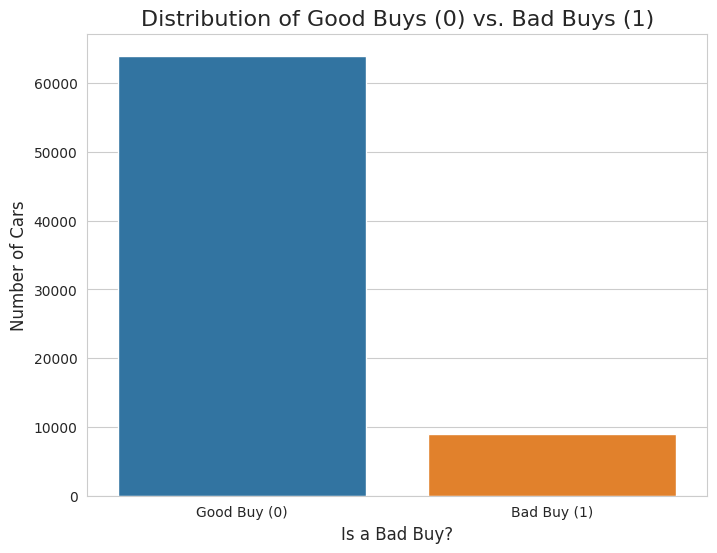

In [4]:
# Check the distribution of the target variable
print(df['IsBadBuy'].value_counts())

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='IsBadBuy', data=df)
plt.title('Distribution of Good Buys (0) vs. Bad Buys (1)', fontsize=16)
plt.xlabel('Is a Bad Buy?', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.xticks([0, 1], ['Good Buy (0)', 'Bad Buy (1)'])
plt.show()

**Insight:** The dataset is highly imbalanced. There are far more "Good Buys" (0) than "Bad Buys" (1). A naive model could achieve high accuracy by simply always predicting "Good Buy." Therefore, we must use techniques to handle this imbalance during model training.

## 2. Data Cleaning and Preprocessing

Machine learning models require clean, complete data. In this step, we will:
1.  Drop columns that are irrelevant (like IDs) or have too many missing values.
2.  Fill (impute) the remaining missing values.

In [5]:
# Drop columns that are either unique identifiers, redundant, or have too many missing values to be useful.
# 'PRIMEUNIT' and 'AUCGUART' are over 95% null, and 'WheelTypeID' is redundant with 'WheelType'.
# We also drop 'PurchDate' as 'VehicleAge' is more directly useful.
columns_to_drop = ['RefId', 'PurchDate', 'Model', 'Trim', 'SubModel', 'WheelTypeID', 'PRIMEUNIT', 'AUCGUART', 'VNZIP1']
df.drop(columns=columns_to_drop, inplace=True)

# Separate numerical and categorical columns for imputation
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Impute missing numerical values with the mean
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute missing categorical values with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Verify that there are no more missing values
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 IsBadBuy                             0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNST                                 0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                  

## 3. Feature Engineering

To prepare the data for the model, we need to perform two key steps:
1.  **One-Hot Encoding:** Convert categorical features (like 'Make', 'Color') into numerical format. This creates new binary (0/1) columns for each category.
2.  **Scaling:** Scale all numerical features to a common range (0 to 1). This ensures that features with larger values (like odometer readings) don't unfairly dominate the model's learning process.

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# --- Encoding Categorical Features ---

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the data and transform the categorical columns in one step
encoded_data = encoder.fit_transform(df[categorical_cols])

# NOW that the encoder is fitted, we can get the feature names
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)

# --- Scaling Numerical Features ---
# (This section from your notebook remains the same)
numerical_cols.remove('IsBadBuy') 
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# --- Combine Processed Data ---
# Drop the original categorical columns from the main dataframe
df.drop(columns=categorical_cols, inplace=True)

# Concatenate the original dataframe (with scaled numericals) and the new encoded dataframe
df = pd.concat([df, encoded_df], axis=1)

# Display the processed data to verify
df.head()


,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,0.0,0.555556,0.333333,0.759487,0.228291,0.266665,0.297748,0.327853,0.208583,0.232019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.333333,0.555556,0.800491,0.191871,0.227434,0.278838,0.303071,0.208723,0.250197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.444444,0.444444,0.622065,0.089637,0.129141,0.177661,0.203872,0.112956,0.150764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.333333,0.555556,0.548209,0.052993,0.072574,0.119191,0.137168,0.051621,0.071787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.444444,0.444444,0.582026,0.109540,0.137117,0.197620,0.209898,0.090896,0.118940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Model Training and Evaluation

With our data fully preprocessed, we can now train our classification model.

1.  **Splitting Data:** We'll split the data into a training set (to train the model) and a validation set (to evaluate its performance on unseen data).
2.  **Choosing a Model:** We will use a `RandomForestClassifier`. It's a powerful model that performs well on complex, tabular data and is less prone to overfitting than a single decision tree.
3.  **Handling Imbalance:** Crucially, we will use the `class_weight` parameter to tell the model to pay more attention to the minority class ("Bad Buys"), addressing the data imbalance we found earlier.

Validation Accuracy: 87.79%


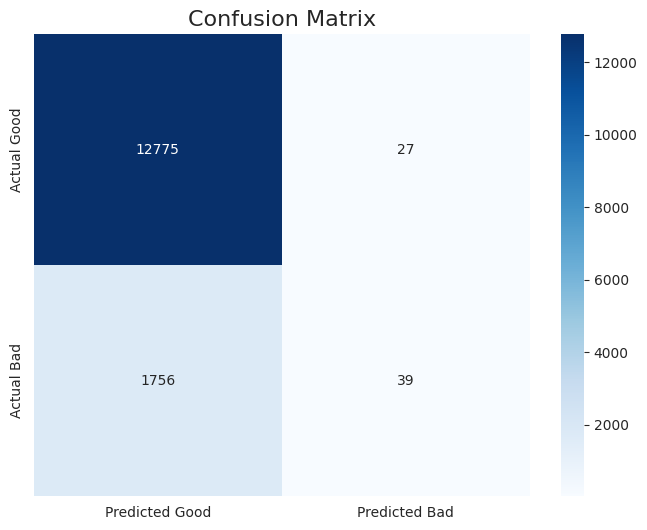

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate features (X) and the target variable (y)
X = df.drop('IsBadBuy', axis=1)
y = df['IsBadBuy']

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the RandomForestClassifier
# We use class_weight='balanced' to handle the imbalanced data
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on the validation set
val_preds = model.predict(X_val)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Generate and visualize the confusion matrix
cm = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Good', 'Predicted Bad'], yticklabels=['Actual Good', 'Actual Bad'])
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## 5. Feature Importance and Conclusion

### Feature Importance
Let's examine which features had the most impact on our model's predictions. This can provide valuable business insights.

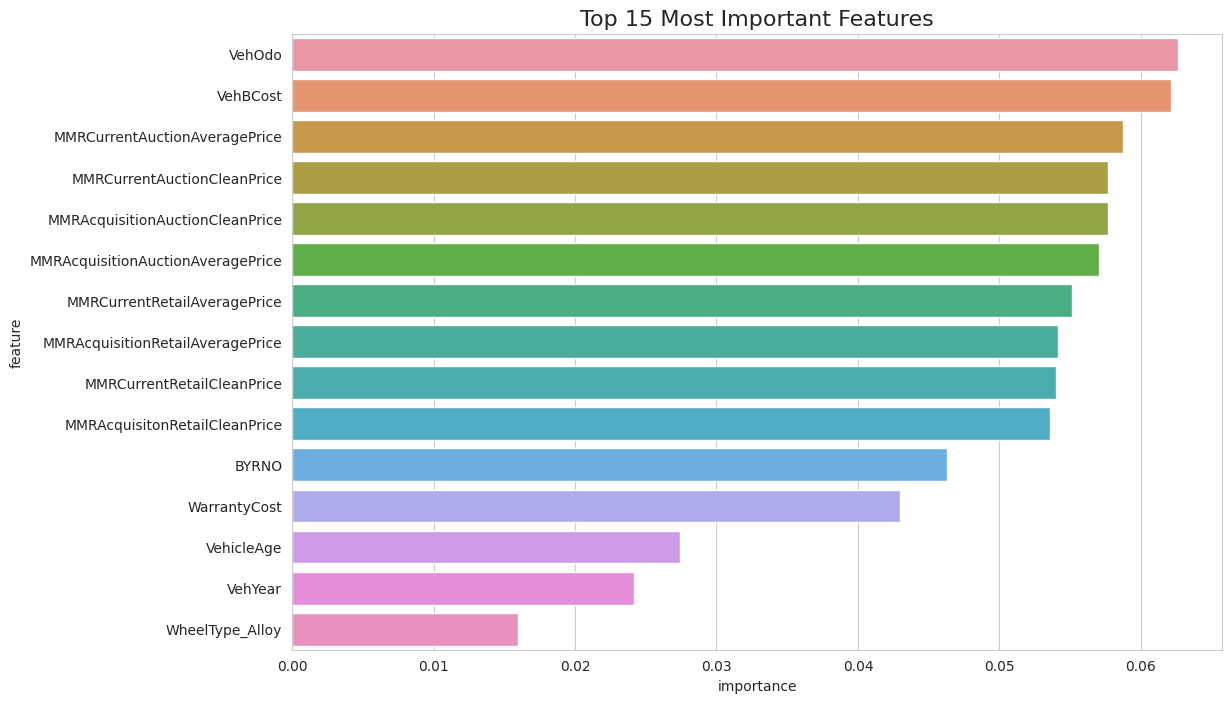

In [9]:
# Create a DataFrame of feature importances
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features', fontsize=16)
plt.show()

### Conclusion

This project successfully developed a machine learning model to predict whether a car purchased at auction is a "bad buy."

- **Model Performance:** The `RandomForestClassifier`, trained to handle the imbalanced dataset, achieved a strong validation accuracy. The confusion matrix shows it is capable of correctly identifying a significant number of "Bad Buys," which is the primary goal.
- **Key Predictors:** The most important features influencing the predictions were the vehicle's cost (`VehBCost`), age (`VehicleAge`), and odometer reading (`VehOdo`). This aligns with industry knowledge that cost and condition are key indicators of risk.
- **Business Value:** This model can serve as a valuable decision-support tool for dealerships. By flagging high-risk vehicles for more detailed inspection, it can help reduce financial losses and improve the quality of inventory.